# Aprendiendo Machine Learning con Python 

Luego de desarrollar modelos de aprendizajes supervisados, veremos como optimizarlo y evaluarlo con la metodología adecuada. 

___
En principio, importemos las librerías y conjunto de datos con el que vamos a trabajar.

**Ejercicio** - Este conjunto de datos consta de 3 tipos diferentes de lirios (Setosa, Versicolour y Virginica) de longitud de pétalos y sépalos. Las columnas son: longitud del sépalo, ancho del sépalo, longitud del pétalo y ancho del pétalo. [scikit-learn](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html?highlight=data%20iris).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#datos
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

X = iris.data 
y = iris.target

#print(X, y)

In [3]:
print(iris.feature_names, iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


In [4]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['Species'])
#df

Dividimos el conjunto en datos de entrenamiento y datos de pruebas.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape, X_test.shape)

(120, 4) (30, 4)


Trabajaremos con el modelo de KNeighbors.

In [6]:
mo_KN = KNeighborsClassifier(n_neighbors=1) 
mo_KN.fit(X_train, y_train)
print(mo_KN.score(X_test, y_test))

0.9


### Cross-validation

La validación cruzada [scikit-learn](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) consiste en entrenar y luego validar nuestro modelo en varios cortes del conjunto de entrenamiento, el cual se divide en k conjuntos más pequeños y se les aplica el siguiente procedimiento:

- Un modelo se entrena usando k-1 cortes como datos de entrenamiento.
- El otro corte se utiliza como un conjunto de pruebas para calcular una medida de rendimiento como la precisión.

Este enfoque puede ser computacionalmente costoso, pero no desperdicia demasiados datos, siendo una gran ventaja para muestras muy pequeñas. 

___
Utilizaremos la funcion `cross_val_score` con los siguientes parámetros: `modelo`, `X`, `y` y `cv` que nos configura el número de divisiones. 

In [7]:
from sklearn.model_selection import cross_val_score

In [8]:
cross = cross_val_score(KNeighborsClassifier(2), X_train, y_train, cv=5)
print(cross, cross.mean())

[0.95833333 1.         0.95833333 0.95833333 0.95833333] 0.9666666666666668


### Mejor valor para el parámetro
#### Validation Curve
Podemos observar el valor de n_neighbors para el cual el modelo tiene el mejor rendimiento, para ello utilizamos la función `validation_curve` de [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html?highlight=validation_curve#sklearn.model_selection.validation_curve).

Utilizamos los siguientes parámetros: `modelo`, `X`, `y`, `param_name` y `param_range` que representan el nombre del parámetro que se modificará y valores del parámetro que se evaluará, respectivamente; y `cv`.

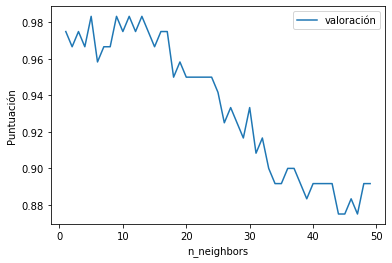

In [9]:
from sklearn.model_selection import validation_curve
k = np.arange(1, 50)
train_score, val_score = validation_curve(KNeighborsClassifier(k), X_train, y_train, param_name='n_neighbors', param_range=k, cv=5)

plt.plot(k, val_score.mean(axis=1), label='valoración')
plt.ylabel('Puntuación')
plt.xlabel('n_neighbors')
plt.legend()

### Combinando parámetros
#### GridSearchCV

Los distintos modelos de Machine Learning tienen uno o varios parámetros. Si queremos probar las mejores combinaciones en los parámetros para conseguir un mejor rendimiento utilizamos la función `GridSearchCV` [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV), la cual hace una búsqueda exhaustiva de valores de parámetros especificados para un estimador.

In [10]:
from sklearn.model_selection import GridSearchCV 
param_grid = {'n_neighbors': np.arange(1, 50), 'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print( grid.best_params_, grid.best_score_)

{'metric': 'euclidean', 'n_neighbors': 5} 0.9833333333333334


### Número de datos
#### Learning Curve

Con las curvas de aprendizaje, podría saber si nuestro modelo tiene un mejor rendimiento si le proporcionamos más datos. Éstas muestran la evolución del desempeño en función de la cantidad de datos que se le proporciones. Normalmente, mientras más datos, mejor es su rendimiento. 

Utilizaremos la función `learning_curve` de [scikit_learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html?highlight=learning%20curve#sklearn.model_selection.learning_curve), usando los siguinetes parámetros: `modelo`, `X`, `y`, `cv` y `train_sizes` que representa números relativos o absolutos de ejemplos de formación que se utilizarán para generar la curva de aprendizaje.

In [11]:
from sklearn.model_selection import learning_curve
N, train_score, val_score = learning_curve(KNeighborsClassifier(), X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=5 )
print(N)

[ 9 19 28 38 48 57 67 76 86 96]


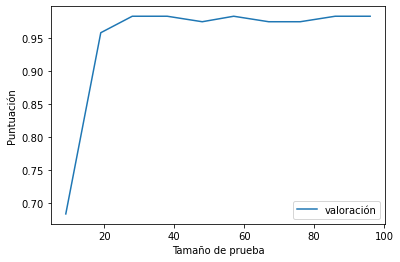

In [12]:
plt.plot(N, val_score.mean(axis=1), label='valoración')
plt.ylabel('Puntuación')
plt.xlabel('Tamaño de prueba')
plt.legend()